In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataRaw = np.loadtxt("iris-head-num.txt", delimiter=',', dtype='object')

In [3]:
header = dataRaw[0,:]

In [4]:
data = dataRaw[1:,:4]
data = np.vstack(data.astype(np.float32))

In [5]:
labels = np.vstack(dataRaw[1:,4].astype(np.int32))

In [6]:
labelsUn, labelsCounts = np.unique(labels, return_counts=True)

In [7]:
nrows,ncols = np.shape(data)
nclasses = len(labelsUn)  

In [8]:
average = np.zeros((nclasses,ncols))
maxi = np.zeros((nclasses,ncols))
mini = np.zeros((nclasses,ncols))
sd = np.zeros((nclasses,ncols))
for i in labelsUn:
    indexes = np.reshape(labels==i,nrows)
    average[i-1,:] = np.mean(data[indexes,:],axis=0)
    maxi[i-1,:] = np.max(data[indexes,:],axis=0)
    mini[i-1,:] = np.min(data[indexes,:],axis=0)
    sd[i-1,:] = np.std(data[indexes,:],axis=0)

In [9]:
outliers2sd = np.zeros((nclasses,ncols))
for i in labelsUn:
    indexes = np.reshape(labels==i,nrows)
    classData = data[indexes,:]
    for j in range(ncols):
        thresholdLow = average[i-1,j]-2*sd[i-1,j]
        thresholdHigh = average[i-1,j]+2*sd[i-1,j]
        remain = [x for x in classData[:,j] if(x > thresholdLow)]
        remain = [x for x in classData[:,j] if(x < thresholdHigh)]
        outliers2sd[i-1,j] = 100 * (labelsCounts[i-1] - len(remain)) / labelsCounts[i-1]

In [10]:
decimals = 2
fmt = "%.2f"
formatf = ".csv"
species = np.array(['setosa','versicolor','virginica'])
for i in range(len(labelsUn)):
    temp = np.vstack( [average[i,:], mini[i,:], maxi[i,:], sd[i,:], outliers2sd[i,:]] ).T
    temp = np.around(temp,decimals)
    temp_str = np.char.mod(fmt, temp)
    rows = np.array(header[:-1].astype("U"))[:, np.newaxis]
    rowsf = np.hstack((rows, temp_str))
    headerf = [species[i],'mean','min','max','std','outliers2sd%']
    np.savetxt(species[i]+formatf, np.vstack((headerf, rowsf)), delimiter=',', fmt='%s')

In [25]:
setosa = pd.read_csv('setosa.csv')
setosa

,setosa,mean,min,max,std,outliers2sd%
0,sepallength,5.01,4.3,5.8,0.35,2.0
1,sepalwidth,3.42,2.3,4.4,0.38,4.0
2,petallength,1.46,1.0,1.9,0.17,4.0
3,petalwidth,0.24,0.1,0.6,0.11,4.0


In [6]:
veriscolor = pd.read_csv('versicolor.csv')
veriscolor

,versicolor,mean,min,max,std,outliers2sd%
0,sepallength,5.94,4.9,7.0,0.51,2.0
1,sepalwidth,2.77,2.0,3.4,0.31,2.0
2,petallength,4.26,3.0,5.1,0.47,0.0
3,petalwidth,1.33,1.0,1.8,0.20,2.0


In [7]:
virginica = pd.read_csv('virginica.csv')
virginica

,virginica,mean,min,max,std,outliers2sd%
0,sepallength,6.59,4.9,7.9,0.63,2.0
1,sepalwidth,2.97,2.2,3.8,0.32,4.0
2,petallength,5.55,4.5,6.9,0.55,6.0
3,petalwidth,2.03,1.4,2.5,0.27,0.0


In [34]:
setosa1 = pd.DataFrame(setosa, columns=['sepallength', 'sepalwidth', 'petallength', 'petalwidth'])
setosa1

,sepallength,sepalwidth,petallength,petalwidth
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


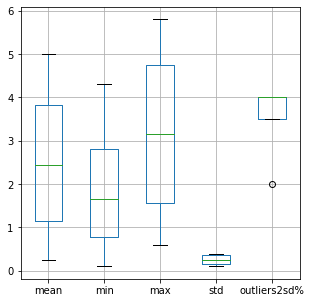

In [27]:
setosa_boxplot = setosa.boxplot(figsize=(5,5))

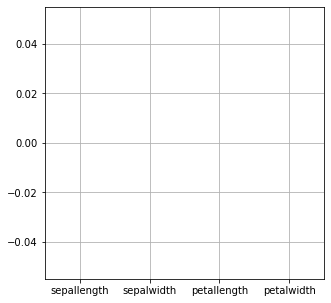

In [35]:
setosa_boxplot1 = setosa1.boxplot(figsize=(5,5))